# Power analysis for Collision Experiments

How many tadpoles should one use for any given effect size of interest?

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [96]:
# Constants

p_base = 0.7                            # Response probability in control
p_target = np.arange(0.4, 0.7, 0.05)    # Possible response probabilities after treatment
n_animals = np.array([10,20,30])        # Possible numbers of tadpoles in each group
n_stim = 20                             # Stimuli per tadpole

n_simulations = 500                     # Number of simulations

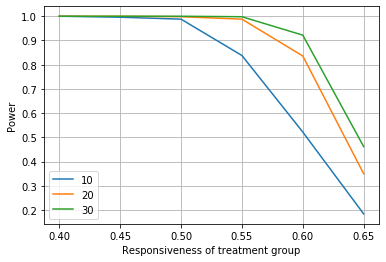

In [98]:
power = np.zeros((len(p_target), len(n_animals)))
for ip in range(len(p_target)):
    p = p_target[ip]
    for ia in range(len(n_animals)):
        count = 0
        for i in range(n_simulations):
            a = 1*(np.random.uniform(size=(n_stim, n_animals[ia])) < p_base) # One tadpole
            b = 1*(np.random.uniform(size=(n_stim, n_animals[ia])) < p)
            _, pval = stats.ttest_ind(np.sum(a,axis=0), np.sum(b,axis=0))
            if pval<0.05:
                count += 1
        power[ip,ia] = count/n_simulations

# Plots
plt.plot(p_target,power);
plt.xlabel('Responsiveness of treatment group');
plt.ylabel('Power');
plt.legend(labels=n_animals, loc='lower left')
plt.grid()

According this simulation, for a base response probabilityof 70%, and with 20 animals in each group (orange line), we can detect a decrease a responsiveness from 70% to 60% with 80% probability (power $\beta = 0.8$).